# Author : Shruti Shetty
# Task 6: Prediction using Decision Tree Algorithm
# The Spark Foundation #gripAugust21

# Importing Libraries

In [6]:
#importing all the required libraries
import numpy as np
import pandas as pd
import sklearn.metrics as sm
import seaborn as sns
import matplotlib.pyplot as plt
import io 
%matplotlib inline

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report

# Importing Libraries

In [7]:
# Loading the dataset
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [11]:
iris_df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [12]:
iris_df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

# Checking the dataset's information

In [13]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [14]:
iris_df.nunique()

sepal length (cm)    35
sepal width (cm)     23
petal length (cm)    43
petal width (cm)     22
dtype: int64

In [15]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Input Data Visualization

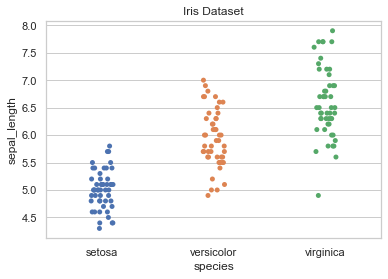

In [17]:
sns.set(style = 'whitegrid')
iris_df = sns.load_dataset('iris');
ax = sns.stripplot(x ='species',y = 'sepal_length',data = iris_df);
plt.title('Iris Dataset')
plt.show()

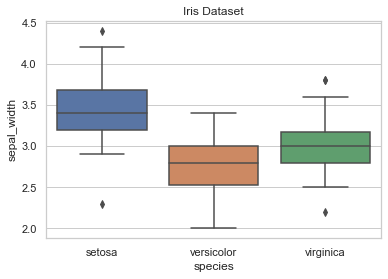

In [18]:
sns.boxplot(x='species',y='sepal_width',data=iris_df)
plt.title("Iris Dataset")
plt.show()

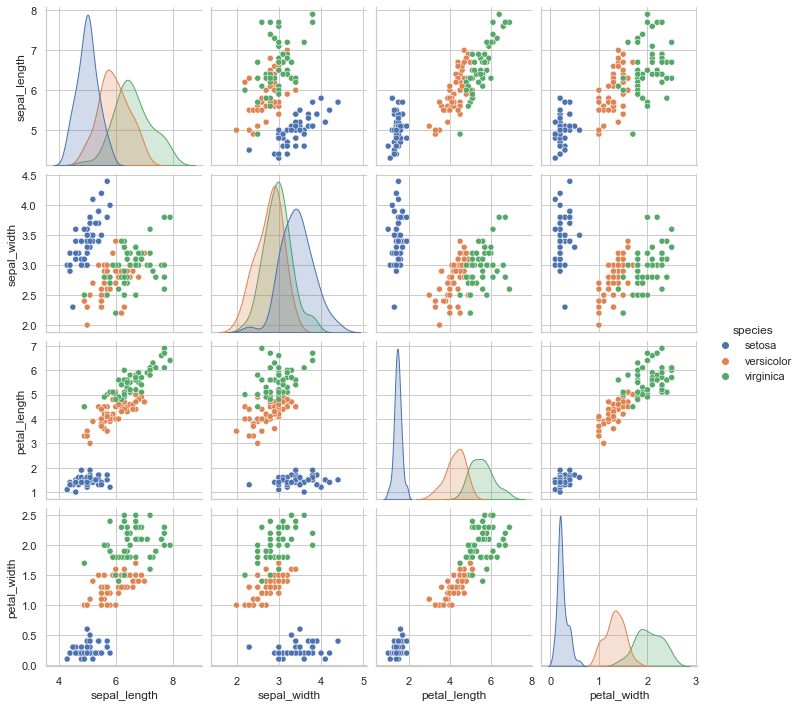

In [19]:
sns.pairplot(iris_df, hue='species')

We can observe that speciesv "Iris Setosa" makes a distinctive cluster in every parameter, while other two species overlap a bit each other.

# Finding the correlation matrix

In [22]:
iris_df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


<AxesSubplot:>

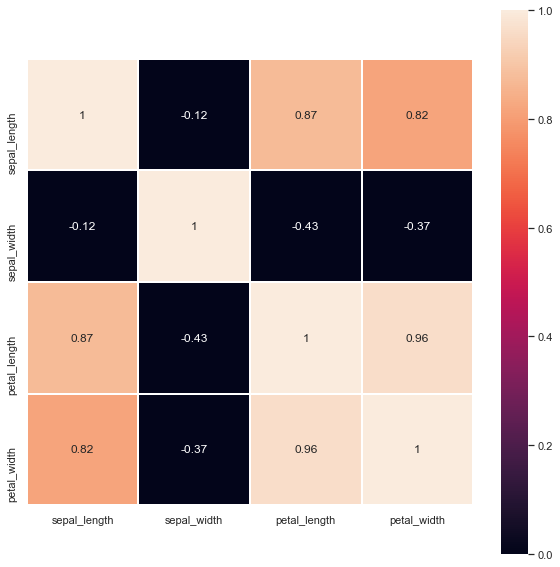

In [23]:
iris1 = iris_df.corr() #finding correlation between variables of iris dataset
fig,ax=plt.subplots(figsize=(10,10))
sns.heatmap(iris1,vmin=0,vmax=1,square=True,annot=True,linewidth=1)

<AxesSubplot:>

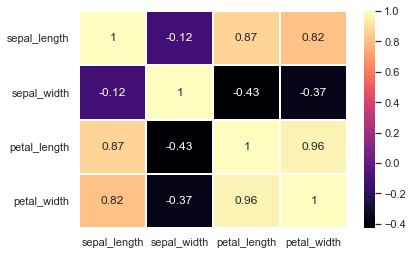

In [24]:
sns.heatmap(iris_df.corr(), annot=True, linewidth=1, cmap='magma')

Here i have observed We observed that: 1.Petal length is highly related to petal width. 2.Sepal length is not related to sepal width. 3.Negative correlation of Sepal width with Petal length and Petal Width.

# Data preprocessing

In [25]:
target=iris_df['species']
df=iris_df.copy()
df=df.drop('species', axis=1)
df.shape

(150, 4)

In [26]:
#defining the attributes and labels
X=iris_df.iloc[:, [0,1,2,3]].values
le=LabelEncoder()
iris_df['species']=le.fit_transform(iris_df['species'])
y=iris_df['species'].values
iris_df.shape

(150, 5)

# Training the model

here i have split the data into test and train.

In [27]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
print("Trainging split:",X_train.shape)
print("Testing spllit:",X_test.shape)

Trainging split: (120, 4)
Testing spllit: (30, 4)


Defining Decision Tree Algorithm

In [28]:
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)
print("Decision Tree Classifier created!")

Decision Tree Classifier created!


# Classification Report and Confusion Matrix

In [29]:
y_pred=dtree.predict(X_test)
print("Classification report:\n",classification_report(y_test,y_pred))

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.91      0.91      0.91        11
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.94        30
weighted avg       0.93      0.93      0.93        30



In [30]:
acc = sm.accuracy_score(y_test,y_pred)
print("The Accuracy is: {0}%".format(acc*100))

The Accuracy is: 93.33333333333333%


In [31]:
#confusion matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[ 9,  0,  0],
       [ 0, 10,  1],
       [ 0,  1,  9]], dtype=int64)

# Visualization of Trained Model

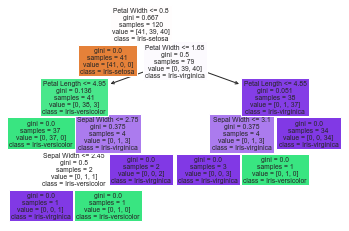

In [32]:
#visualizing the graph
def mt():
  mt.figure(figsize=(20,10))
# tree=plot_tree(dtree,feature_names=df.columns,precision=2,rounded=True,filled=True,class_names=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
feature=['Sepal Length','Sepal Width','Petal Length','Petal Width']
class_name =['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
plot_tree(dtree, filled = True,class_names=class_name,feature_names=feature);
plt.show()

# Testing for New points except from Dataset

In [33]:
Test_point = [[5.4,3.0,4.5,1.5],
             [6.5,2.8,4.6,1.5],
             [5.1,2.5,3.0,1.1],
             [5.1,3.3,1.7,0.5],
             [6.0,2.7,5.1,1.6],
             [6.0,2.2,5.0,1.5]]

print(dtree.predict(Test_point))

[1 1 1 0 1 2]


Conclusion: I have successfully implemented Prediction using Decision Tree Algorithm and got successful output